In [6]:
packageDescription("Lahman")
help(package = "Lahman")
install.packages("Lahman")

Package: Lahman
Type: Package
Title: Sean 'Lahman' Baseball Database
Version: 9.0-0
Date: 2021-04-08
Authors@R: c(person(given = "Michael", family = "Friendly", role="aut",
        email="friendly@yorku.ca"), person(given ="Chris", family =
        "Dalzell", role=c("cre","aut"), email="cdalzell@gmail.com"),
        person(given ="Martin", family = "Monkman", role="aut"),
        person(given= "Dennis", family = "Murphy", role="aut"),
        person(given ="Vanessa", family = "Foot", role="ctb"),
        person(given = "Justeena", family = "Zaki-Azat", role="ctb") )
Author: Michael Friendly [aut], Chris Dalzell [cre, aut], Martin
        Monkman [aut], Dennis Murphy [aut], Vanessa Foot [ctb],
        Justeena Zaki-Azat [ctb]
Maintainer: Chris Dalzell <cdalzell@gmail.com>
Description: Provides the tables from the 'Sean Lahman Baseball
        Database' as a set of R data.frames. It uses the data on
        pitching, hitting and fielding performance and other tables
        from 1871 thr

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)



Documentation for package ‘Lahman’


		Information on package ‘Lahman’

Description:

Package:               Lahman
Type:                  Package
Title:                 Sean 'Lahman' Baseball Database
Version:               9.0-0
Date:                  2021-04-08
Authors@R:             c(person(given = "Michael", family = "Friendly",
                       role="aut", email="friendly@yorku.ca"),
                       person(given ="Chris", family = "Dalzell",
                       role=c("cre","aut"),
                       email="cdalzell@gmail.com"), person(given
                       ="Martin", family = "Monkman", role="aut"),
                       person(given= "Dennis", family = "Murphy",
                       role="aut"), person(given ="Vanessa", family =
                       "Foot", role="ctb"), person(given = "Justeena",
                       family = "Zaki-Azat", role="ctb") )
Author:                Michael Friendly [aut], Chris Dalzell [cre,
                       au

## Hypothesis Testing

### Hypothesis Testing and FDR

In [62]:
library(dplyr)
library(tidyr)
library(Lahman)
library(knitr)
opts_chunk$set(cache = TRUE, warning = FALSE, message = FALSE, tidy = FALSE, fig.height = 5, fig.width = 6.67, out.height = "3in",out.width = "4in")
options(digits = 3)
library(scales)
library(ggplot2)
theme_set(theme_bw())

In [63]:
career <- Batting %>%
  filter(AB > 0) %>%
  anti_join(Pitching, by = "playerID") %>%
  group_by(playerID) %>%
  summarize(H = sum(H), AB = sum(AB)) %>%
  mutate(average = H / AB)

In [73]:
career <- Master %>%
  as_tibble() %>%
  dplyr::select(playerID, nameFirst, nameLast) %>%
  unite(name, nameFirst, nameLast, sep = " ") %>%
  inner_join(career, by = "playerID")

In [65]:
# values estimated by maximum likelihood in Chapter 3
alpha0 <- 101.4
beta0 <- 287.3

In [66]:
career_eb <- career %>%
  mutate(eb_estimate = (H + alpha0) / (AB + alpha0 + beta0),
         alpha1 = H + alpha0,
         beta1 = AB - H + beta0)

In [67]:
career_eb %>%
    filter(name == "Hank Aaron")

playerID,name,H,AB,average,eb_estimate,alpha1,beta1
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
aaronha01,Hank Aaron,3771,12364,0.305,0.304,3872,8880


In [68]:
hank_aaron <- career_eb %>%
  filter(name == "Hank Aaron")

In [69]:
pbeta(.3,3850,8818)

[1] 0.169

In [70]:
career_eb <- career_eb %>%
    mutate(PEP = pbeta(.3, alpha1, beta1))

In [71]:
hank_aaron_average <- hank_aaron$eb_estimate

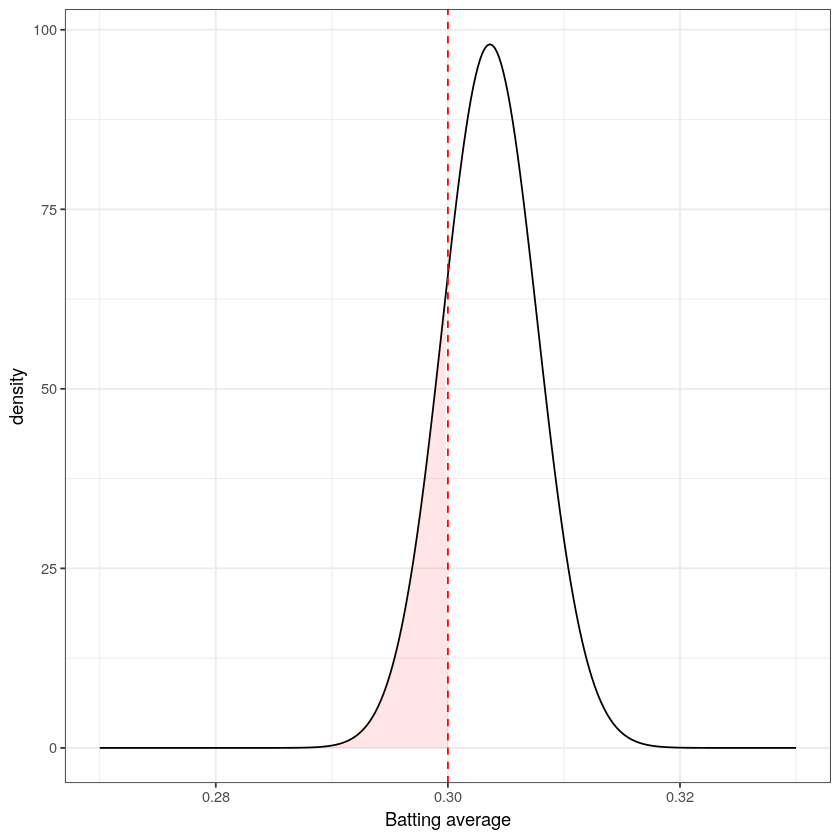

In [74]:
career_eb %>%
  filter(name == "Hank Aaron") %>%
  do(tibble(x = seq(.27, .33, .0002),
                density = dbeta(x, .$alpha1, .$beta1))) %>%
  ggplot(aes(x, density)) +
  geom_line() +
  geom_ribbon(aes(ymin = 0, ymax = density * (x < .3)),
              alpha = .1, fill = "red") +
  geom_vline(color = "red", lty = 2, xintercept = .3) +
  labs(x = "Batting average")